In [1]:
###-----------------
### Import libraries
###-----------------

from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score  # Import function to calculate various metric

from collections.abc import Callable  # Type hinting callable objects/functions
from typing import Literal  # Literal type hints to restrict variable values

from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import for standardizing features (zero mean, unit variance)
import tensorflow as tf
from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix

In [2]:
###----------------------
### Some basic parameters
###----------------------

RANDOM_STATE = 42 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE) # setting for Tensorflow as well
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

ALPHA = 0.001
EPOCHS = 100 # number of cycles to run



# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params) # update rcParams

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True) #[0] as we have 1.

In [4]:
data_df = pd.read_csv('Wine.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [5]:
for col in data_df.columns:
    print(f'Col: {col} - {data_df[col].unique()}')

Col: alcohol - [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Col: malic_acid - [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.0

Above we can see 352, 466 ... etc. These look altered

<Axes: >

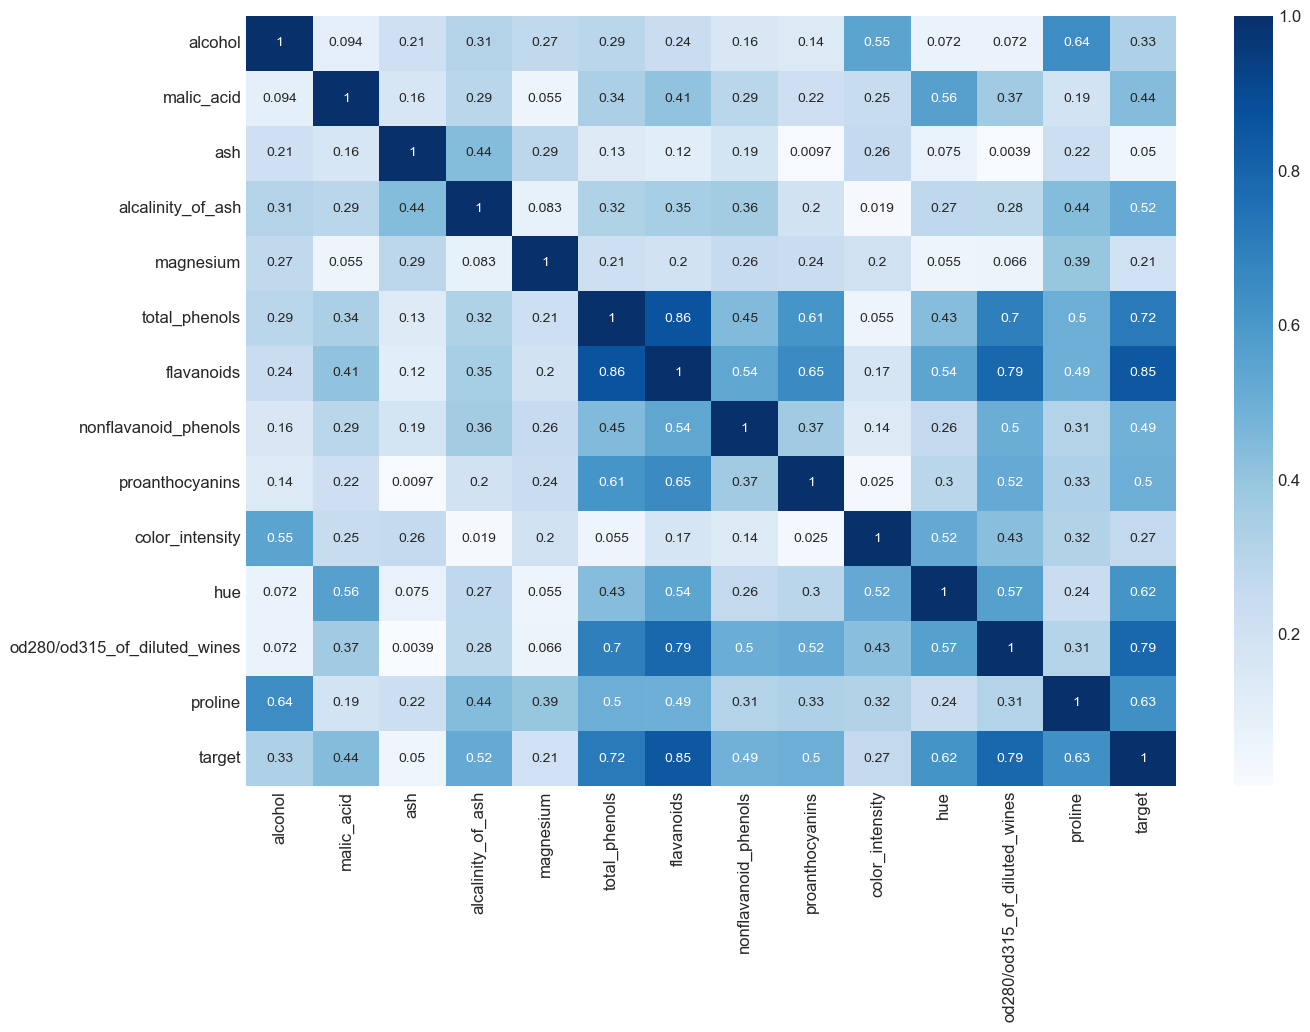

In [6]:
fig, ax = plt.subplots()
sns.heatmap(data_df.corr().abs(), ax=ax, cmap='Blues', annot=True, fmt='.2g')

In [7]:
labels = data_df[data_df.columns[-1]]
features_df = data_df.drop(data_df.columns[-1], axis=1)
features_df.shape, labels.shape 

((178, 13), (178,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=labels)

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((142, 13), (36, 13), (142,), (36,))

If the target data is not in order eg 1,2,4 it skipped 3. do we should Label encode to ensure its works correctly

Define model

module -> starts with small,
Class -> Capital letter

In [33]:
model = tf.keras.Sequential?

Init signature: tf.keras.Sequential(*args, **kwargs)
Docstring:     
`Sequential` groups a linear stack of layers into a `Model`.

Examples:

```python
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))
len(model.weights)  # Returns "2"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = keras.Sequential()
model.add(keras.layers.Dense(8

In [9]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3)    # Tensor flow recommends not to put any activation function 
                                # in last layer in classification and regression does not need

])

In [10]:
print(model)

<Sequential name=sequential, built=True>


### Functional API

In [11]:
# inputs = tf.keras.Input(shape=(X_train.shape[1],))

# x = tf.keras.layers.Dense(8, activation='relu')(inputs)
# outputs = tf.keras.layers.Dense(3)(x)

# model1= tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
# print(model1)

### testing if model is working

In [13]:
X_train[:1].shape

(1, 13)

In [14]:
predictions = model(X_train[:1]).numpy()
predictions.sum()

np.float32(-0.12313655)

#### there are softmax function and softmax layer

In [15]:
tf.nn.softmax(predictions).numpy().sum()

np.float32(0.99999994)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

know when to use SparseCategoricalCrossentropy and CategoricalCrossentropy. depends on your 'y'

when target is one hot encoded then use Categorical, else SparseCategorical

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

np.float32(1.0627279)

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)

In [19]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, validation_data=[X_test,y_test], epochs=EPOCHS)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.2887 - loss: 1.3319 - val_accuracy: 0.2778 - val_loss: 1.3321
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2958 - loss: 1.2825 - val_accuracy: 0.3056 - val_loss: 1.2780
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3451 - loss: 1.2357 - val_accuracy: 0.3333 - val_loss: 1.2258
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3944 - loss: 1.1909 - val_accuracy: 0.3333 - val_loss: 1.1754
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4507 - loss: 1.1473 - val_accuracy: 0.3611 - val_loss: 1.1270
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4859 - loss: 1.1048 - val_accuracy: 0.3611 - val_loss: 1.0805
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4859 - loss: 1.0636 - val_accuracy: 0.3889 - val_loss: 1.0362
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.0241 - val_accuracy: 0.4444 - val_loss:

below throws loss on test and accuracy on test

In [21]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9722 - loss: 0.1122


[0.11222924292087555, 0.9722222089767456]

In [22]:
df_hist = pd.DataFrame(history.history)
df_hist

,accuracy,loss,val_accuracy,val_loss
0,0.288732,1.331926,0.277778,1.332054
1,0.295775,1.282508,0.305556,1.278050
2,0.345070,1.235697,0.333333,1.225782
3,0.394366,1.190898,0.333333,1.175415
4,0.450704,1.147335,0.361111,1.126962
...,...,...,...,...
95,0.971831,0.119266,0.972222,0.118849
96,0.971831,0.117491,0.972222,0.117134
97,0.971831,0.115552,0.972222,0.115459
98,0.971831,0.113572,0.972222,0.113823


<Axes: >

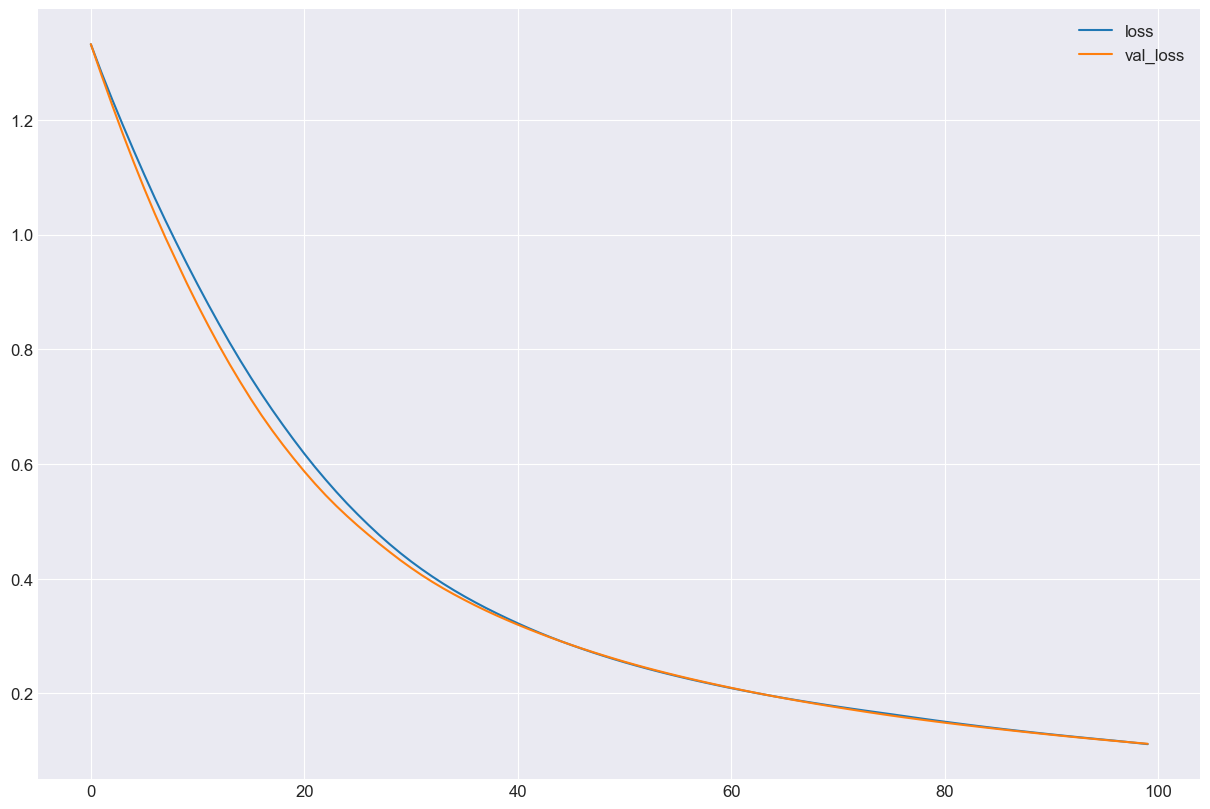

In [23]:
df_hist.plot(y = ['loss', 'val_loss'])

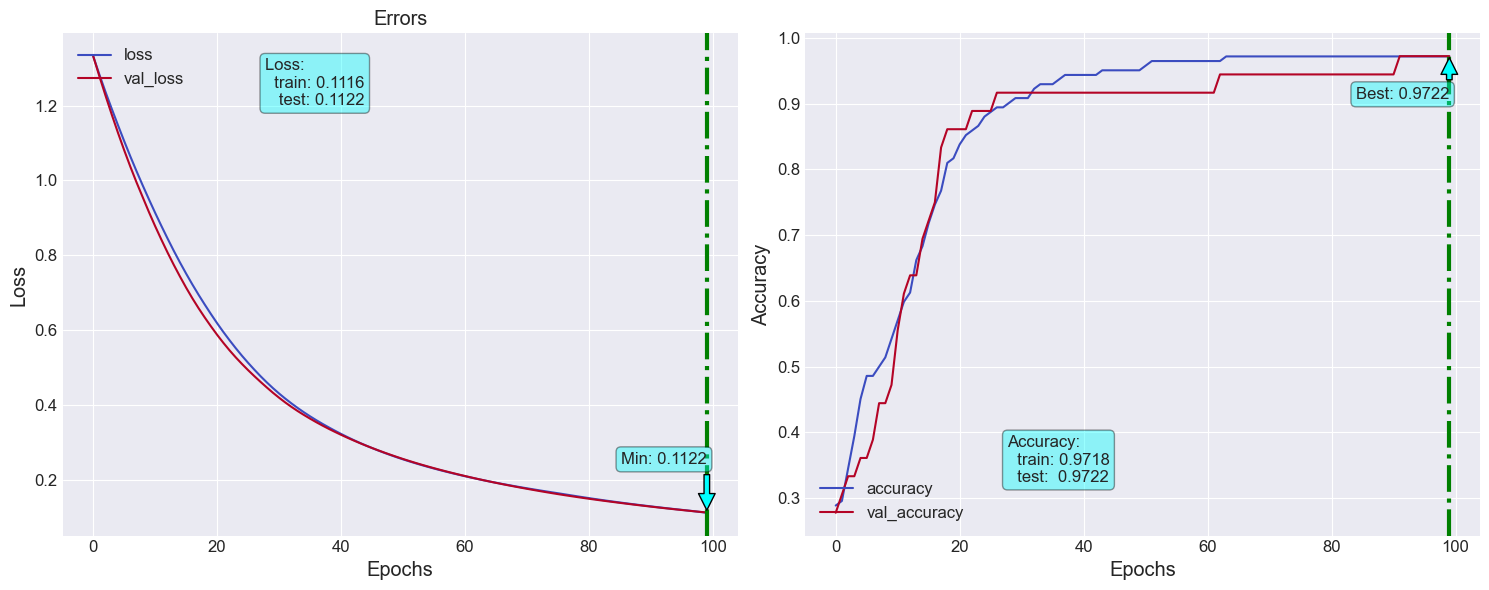

In [24]:
fn_plot_tf_hist(df_hist)

In [25]:
class_names = {}
for i, cl in enumerate(le.classes_):
    class_names[i] = cl

class_names

{0: np.int64(0), 1: np.int64(1), 2: np.int64(2)}

# Predictions

In [26]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

y_pred = prob_model(X_train).numpy()
print(f'Accuracy: {accuracy_score(y_train,y_pred.argmax(axis=1))}')
print(classification_report(y_train, y_pred.argmax(axis=1)))

Accuracy: 0.971830985915493
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.93      0.96        57
           2       0.95      1.00      0.97        38

    accuracy                           0.97       142
   macro avg       0.97      0.98      0.97       142
weighted avg       0.97      0.97      0.97       142



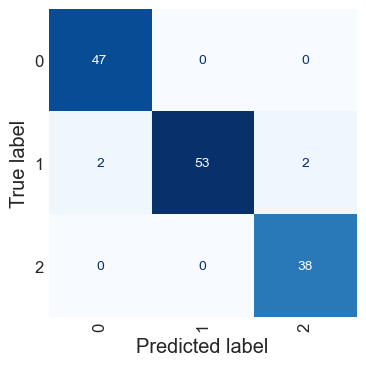

In [29]:
fn_plot_confusion_matrix(y_train, y_pred.argmax(axis=1), labels=class_names)

# Prediction test

In [30]:
y_pred = prob_model(X_test).numpy()
print(f'Accuracy: {accuracy_score(y_test,y_pred.argmax(axis=1))}')
print(classification_report(y_test, y_pred.argmax(axis=1)))

Accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



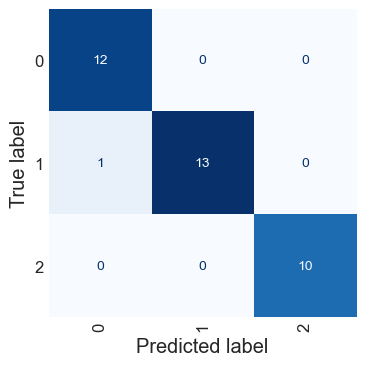

In [32]:
fn_plot_confusion_matrix(y_test, y_pred.argmax(axis=1), labels=class_names)

In [27]:
# fn_plot_confusion_matrix(predictions[X_train[:1]], y_test)